In [1]:
import pandas as pd

In [3]:
data = pd.read_pickle("../datasets/processed/high_density_defects/BN_5e-2/data.pickle.gz")

In [20]:
predictions = {}
for target in ("homo", "lumo", "band_gap"):
    predictions[target] = pd.read_csv(
        f"../datasets/predictions/BN_pilot_5e-2/{target}/megnet_pytorch-sparse-z-were.csv.gz",
        index_col="_id")

In [22]:
import numpy as np

In [39]:
selection = (data["homo"] < data["lumo"])

In [40]:
data[selection]

,descriptor_id,energy,fermi_level,homo,lumo,band_gap,is_band_gap_direct,defect_representation,formation_energy,initial_structure,formation_energy_per_site
_id,,,,,,,,,,,


In [49]:
band_gap_from_homo_lumo = np.maximum(predictions["homo"]["predicted_homo_test"] - predictions["lumo"]["predicted_lumo_test"],0)

In [50]:
band_gap_from_homo_lumo

_id
BN_B62C2N63_816498e1-eef8-400f-93d4-17a0a435389a    0.126216
BN_B62C1N63_631c0dc0-4762-4e3c-93ba-d4876a1b7997    1.044878
BN_B63C2N62_5ea09385-eb62-43dc-9334-9142794a8de0    0.457278
BN_B63C1N62_e4656f55-37a8-4fcf-bec1-fd7cc833f86b    0.893634
BN_B62C2N63_91fe1ce6-6a19-4a26-8caa-82caf4ca6ac2    0.144110
                                                      ...   
BN_B56C8N56_958b65d0-6745-480a-87ff-02fa53b148c6    0.000000
BN_B56C8N56_413ecc1b-b235-44c3-86f1-5c04e35d1b63    0.121693
BN_B56C8N56_0a1b0043-5f8d-47b3-acc8-17432c195769    0.285519
BN_B56C8N56_a1dbf3a7-1e22-43d0-ae40-3ffb622f4153    0.213933
BN_B56C8N56_e55c8a71-86c7-4d74-b2aa-4ebff26da2ae    0.168480
Length: 500, dtype: float64

In [51]:
import matplotlib.pyplot as plt

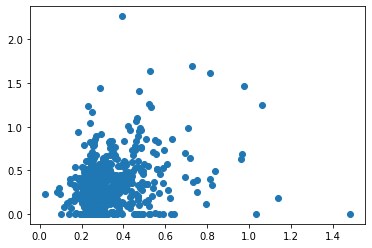

In [52]:
fig, ax = plt.subplots()
ax.scatter(predictions["band_gap"], band_gap_from_homo_lumo)

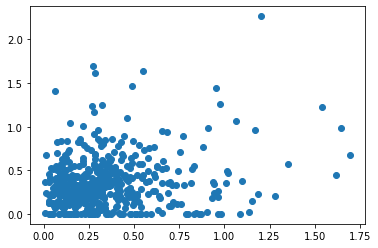

In [54]:
fig, ax = plt.subplots()
ax.scatter(data["band_gap"], band_gap_from_homo_lumo);

In [55]:
np.abs(data["band_gap"]- band_gap_from_homo_lumo).mean()

0.2633615787273408